# TEXT MINING

Dalam data text dikenal dengan istilah corpus dan document. Document merupakan setiap text yang akan kita olah sedangkan corpus adalah kumpulan dari document. 

Contoh aplikasi yang menggunakan data text:  
* Spam filtering
* Sentiment analysis

In [136]:
import pandas as pd 
import numpy as np 
import re

# Data

In [137]:
df_sms = pd.read_csv('sms_spam_collection.csv')

df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# Text Preprocessing 1


Method :

1. converting to lower case
2. contraction
3. remove or convert number into text
4. remove punctuation
5. remove white spaces
6. remove stopwords and particular words

### 1. Converting lowercase

In [138]:
def to_lower(text):
    return text.lower()

In [139]:
text_string = 'Mari belajar di Purwadhika di tahun 2021'
text_string = to_lower(text_string)
print(text_string)

mari belajar di purwadhika di tahun 2021


In [140]:
text_string = 'Mari belajar di Purwadhika di tahun 2021'
text_string = text_string.lower()
print(text_string)

mari belajar di purwadhika di tahun 2021


### 2. Contraction

In [141]:

contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text


In [142]:
text_string = "If I ain't got you"
text_string = main_contraction(text_string)
print(text_string)

If I am not got you


### 3. Remove or Convert Number to Text

In [143]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [144]:
text_string = '2020 was a wonderful year'
text_string = remove_numbers(text_string)
print(text_string)

 was a wonderful year


### 4. Remove Punctuation

In [145]:
from string import punctuation

In [146]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [147]:
def remove_punc(text):
    return ''.join(c for c in text if c not in punctuation)

In [148]:
text_string = "2020, 2012, they're all the same"
text_string = remove_punc(text_string)
print(text_string)

2020 2012 theyre all the same


### 5. Remove White Space

In [149]:
def to_strip(text):
    return " ".join(text.split())

In [150]:
text_string = "There   was      bobby,  alex, fergie, and I"
text_string = to_strip(text_string)
print(text_string)

There was bobby, alex, fergie, and I


### 6. Remove Stop Words and Particular words

Stopwords are words that occur too often and do not provide any additional insight
Stopwords example: I, me, myself, we, our, ourselves, you, yourself, …..

In [151]:
import nltk
from nltk.corpus import stopwords

In [152]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [153]:
# lihat daftar stopwords dalam english
# stopwords.words('english')

In [154]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    stop_words.extend(['u','n','ur'])
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [155]:
text_string = "There was bobby, alex, fergie, and I"
text_string = remove_stopwords(text_string)
print(text_string)

There bobby , alex , fergie , I


## Combine Preprocessing Method

In [156]:
pd.options.display.max_colwidth = None

In [157]:
df_sms['message_prep1'] = df_sms['message'].apply(to_lower)
df_sms['message_prep2'] = df_sms['message_prep1'].apply(main_contraction)
df_sms['message_prep3'] = df_sms['message_prep2'].apply(remove_numbers)
df_sms['message_prep4'] = df_sms['message_prep3'].apply(remove_punc)
df_sms['message_prep5'] = df_sms['message_prep4'].apply(to_strip)
df_sms['message_prep6'] = df_sms['message_prep5'].apply(to_lower)

In [158]:
df_sms.head(3)

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs


# Text Preprocessing 2

- Stemming 
- Lemmatization

## 1. Stemming

Mengubah kata berimbuhan menjadi kata dasar 

In [159]:
from nltk.stem import SnowballStemmer

In [160]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)


In [161]:
text_string = "i am reading book and the book is very fascinating"
text_string = stem(text_string)
print(text_string)

i am read book and the book is veri fascin


## 2. Lemmatization

mengubah kata berimbuhan/kata yg telah berubah menjadi kata yg ada di dalam kamus

In [162]:
from nltk.stem import WordNetLemmatizer

In [163]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [164]:
wordnet_lemmatizer = WordNetLemmatizer()

In [165]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)


In [166]:
text_string = "there she goes, Here I am"
text_string = lemmatize(text_string)
print(text_string)

there she go , Here I am


# Apply Stemming or Lemmatization

In [167]:
df_sms['message_prep_stem'] = df_sms['message_prep6'].apply(stem)
df_sms['message_prep_lemma'] = df_sms['message_prep6'].apply(lemmatize)

df_sms[['message_prep_stem','message_prep_lemma']]


,message_prep_stem,message_prep_lemma
0,go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ok lar joke wif u oni,ok lar joking wif u oni
2,free entri in a wkli comp to win fa cup final tkts st may text fa to to receiv entri questionstd txt ratetc appli over,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply over
3,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say
4,nah i do not think he goe to usf he live around here though,nah i do not think he go to usf he life around here though
...,...,...
5567,this is the nd time we have tri contact u u have won the £ pound prize claim is easi call now onli p per minut btnationalr,this is the nd time we have tried contact u u have won the £ pound prize claim is easy call now only p per minute btnationalrate
5568,will ü b go to esplanad fr home,will ü b going to esplanade fr home
5569,piti was in mood for that soani other suggest,pity wa in mood for that soany other suggestion
5570,the guy did some bitch but i act like be interest in buy someth els next week and he gave it to us for free,the guy did some bitching but i acted like be interested in buying something else next week and he gave it to u for free


# Text Exploration

## 1. Word Freq

dapat digunakan untuk apakah masih ada kata2 yang masih sering muncul tapi tidak berarti

In [168]:
import seaborn as sns 


In [169]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus


In [170]:
kamus_unclean = kamus(df_sms['message_prep_lemma'])

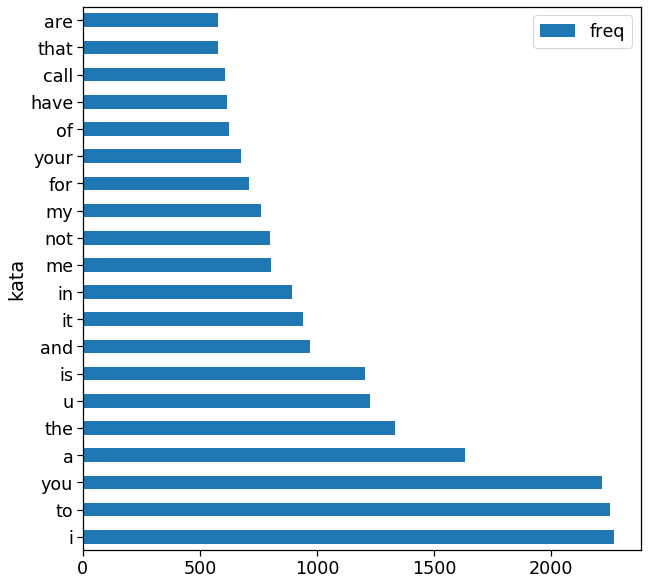

In [172]:
sns.set_context(context='notebook', font_scale=1.6)
kamus_unclean[:20].plot(kind='barh', figsize=(10,10))

## 2. Word Cloud

dapat digunakan untuk apakah masih ada kata2 yang masih sering muncul tapi tidak berarti

dapat digunakan sebagai pembanding

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [174]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")


In [175]:
word_cloud = WordCloud().generate(str(df_sms['message_prep_lemma']))

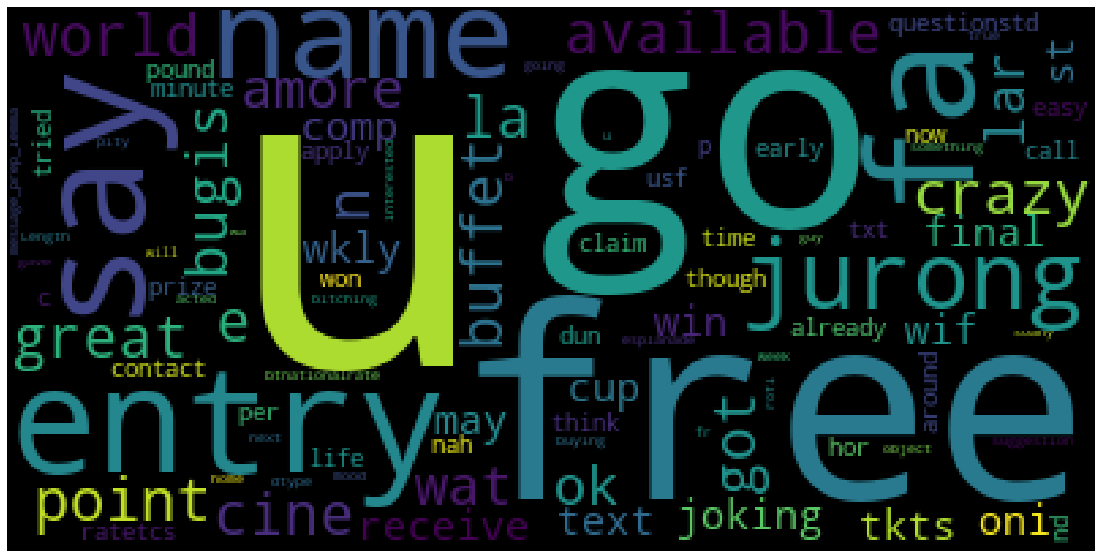

In [176]:
plot_cloud(word_cloud)

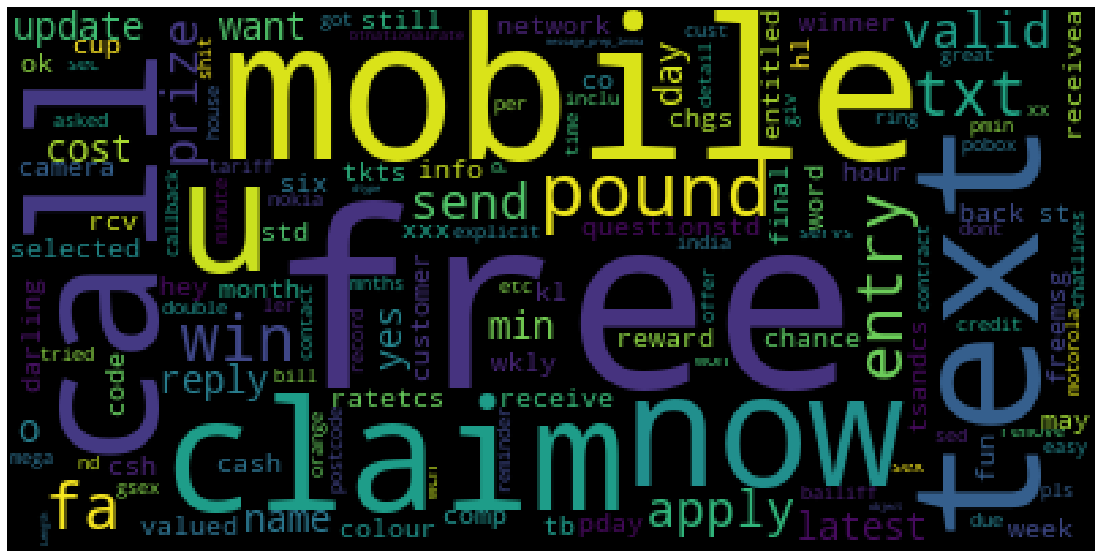

In [177]:
word_cloud = WordCloud().generate(str(df_sms[df_sms['label'] == 'spam']['message_prep_lemma']))
plot_cloud(word_cloud)

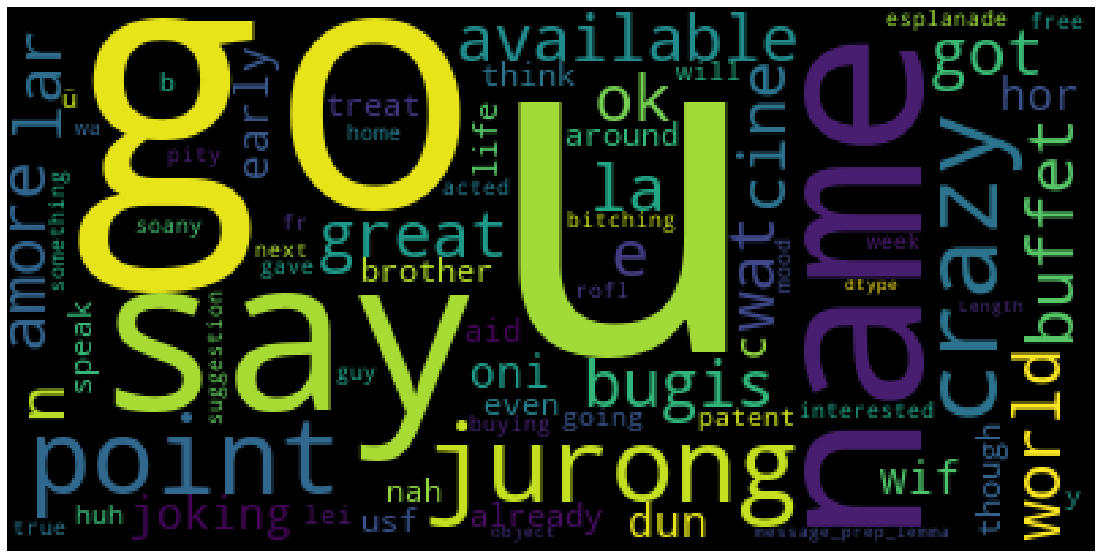

In [178]:
word_cloud = WordCloud().generate(str(df_sms[df_sms['label'] == 'ham']['message_prep_lemma']))
plot_cloud(word_cloud)

## 3. Word Cloud 2

In [179]:
from PIL import Image

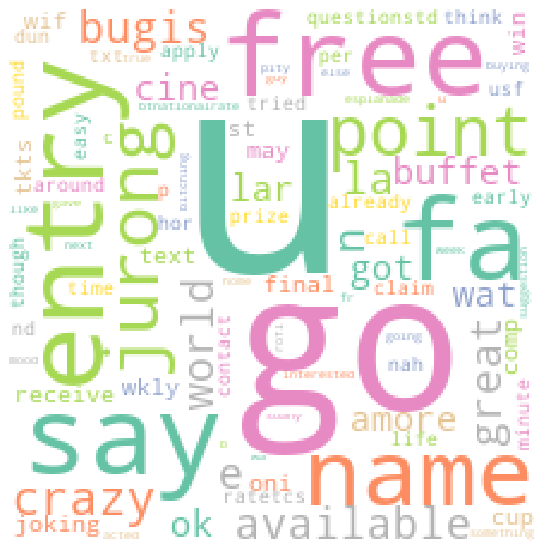

In [180]:
mask = np.array(Image.open('comment.png'))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords.words('english'), mask=mask).generate(str(df_sms['message_prep_lemma']))

plot_cloud(wordcloud)


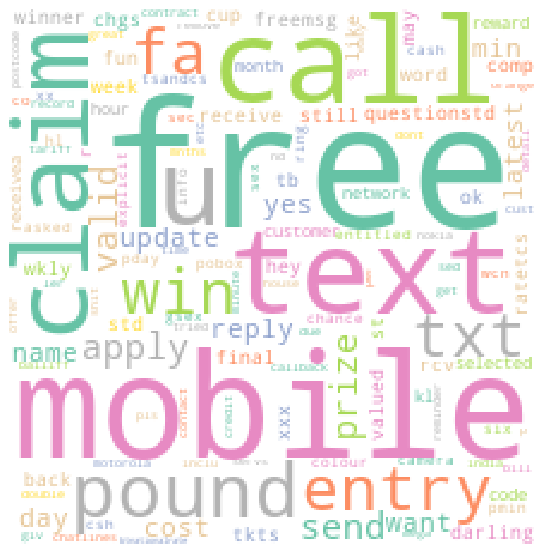

In [181]:
# Spam
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords.words('english'), mask=mask).generate(str(df_sms[df_sms['label']=='spam']['message_prep_lemma']))

plot_cloud(wordcloud)



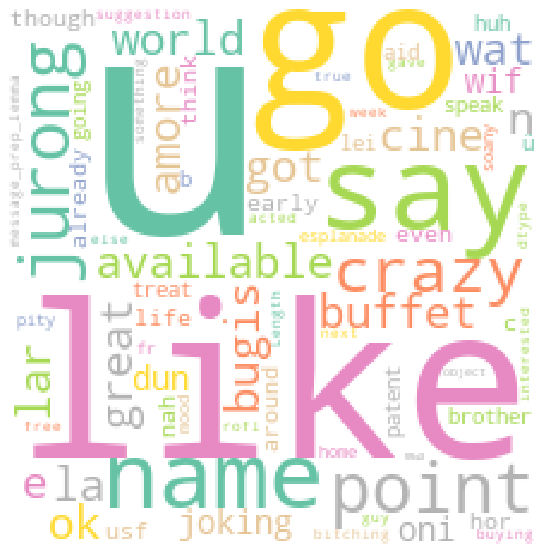

In [127]:
# Non-Spam (ham)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords.words('english'), mask=mask).generate(str(df_sms[df_sms['label']=='ham']['message_prep_lemma']))
plot_cloud(wordcloud)

# Length of Sentence

dalam mengidentifikasi apa yang membedakan anatara spam dan non-spam, kita dapat menggunakan content lainnya seperti Length of the Character.

In [182]:
# buat kolom length
df_sms['length'] = df_sms['message'].apply(len)

In [183]:
df_sms[['message','length']].head()

,message,length
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives around here though",61


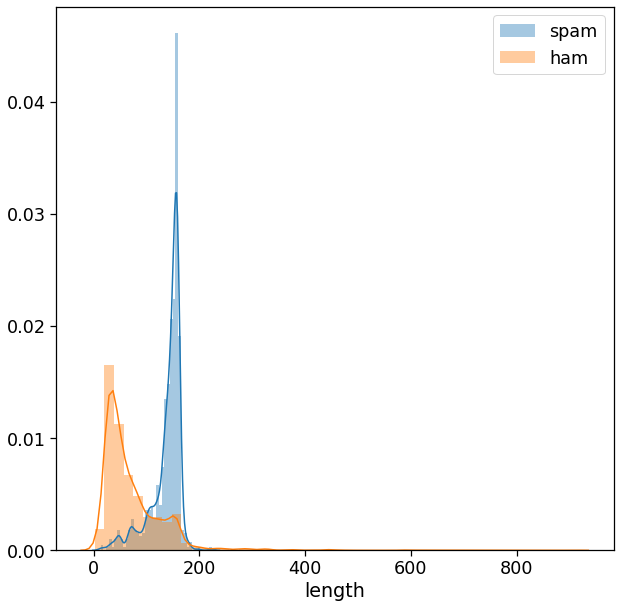

In [184]:
plt.figure(figsize = (10,10))

df_sms_spam = df_sms[df_sms['label'] == 'spam']
df_sms_ham = df_sms[df_sms['label'] == 'ham']

sns.distplot(df_sms_spam['length'])
sns.distplot(df_sms_ham['length'])

plt.legend(['spam','ham'])

plt.show()


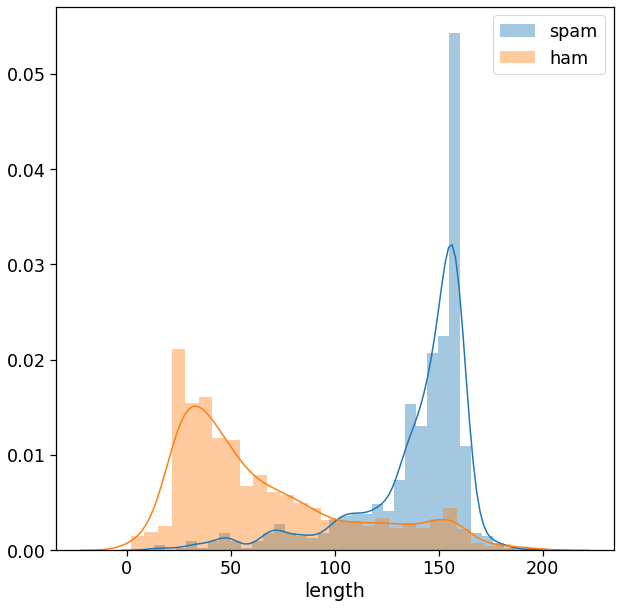

In [185]:
plt.figure(figsize = (10,10))

df_sms2 = df_sms[df_sms['length'] < 200] 
df_sms_spam = df_sms2[df_sms2['label'] == 'spam']
df_sms_ham = df_sms2[df_sms2['label'] == 'ham']

sns.distplot(df_sms_spam['length'])
sns.distplot(df_sms_ham['length'])

plt.legend(['spam','ham'])

plt.show()

# DOCUMENT TERM MATRIX

**Bag of Words**  
Bag of words merupakan metode yang digunakan untuk merepresentasikan text untuk proses training model machine learning. Metode ini memanfaatkan kata dalam setiap dokumen untuk membuat fitur. Bag of words memanfaatkan kemunculan kata dan mengabaikan struktur seperti chapter, paragraf, kalimat serta formatting.  

Dalam prosesnya pembuatan bag of words terdiri dari tiga tahap, tokenization, vocabulary building dan encoding. **Tokenization merupakan proses pemecahan document menjadi setiap kata**. Proses selanjutnya adalah vocabulary building. Pada proses ini kita **mengumpulkan semua kata yang muncul dan menggunakan kata-kata tersebut sebagai fitur**. Terakhir, setiap fitur (salah satunya) dapat berisi banyaknya kemunculan kata dalam setiap document.  




Hasil pengolahan data text dengan bag of words disimpan dalam semacam matrix atau dataframe yang dinamakan document term matrix.

- Term Frequency (TF): berisi frekuensi term atau kata dari setiap dokumen
- Term Frequency - Inverse Document Frequency (TF-IDF): men-skala ulang untuk mengetahui seberapa informatif suatu fitur dalam dokumen tertentu.

## Term Frequency (TF)

In [186]:
from sklearn.feature_extraction.text import CountVectorizer

In [194]:
words_example = ["You already know me, don't you?",
                "I am the best there is"]

In [195]:
# menghitung jumlah kata
vect = CountVectorizer()
vect.fit(word_example)

CountVectorizer()

In [196]:
# urutan dalam abjad (kosakata)
vect.vocabulary_

{'you': 9,
 'already': 0,
 'know': 5,
 'me': 6,
 'don': 3,
 'am': 1,
 'the': 7,
 'best': 2,
 'there': 8,
 'is': 4}

In [197]:
print("vocabulary size:", len(vect.vocabulary_))
print("vocabulary content: \n", vect.vocabulary_.keys())

vocabulary size: 10
vocabulary content: 
 dict_keys(['you', 'already', 'know', 'me', 'don', 'am', 'the', 'best', 'there', 'is'])


In [199]:
# ditransform ke dalam matrix
dtm = vect.transform(words_example)
dtm

<2x10 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [200]:
# diubah ke array
dtm.toarray()

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [201]:
# malihat vocab/words
vect.get_feature_names()

['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there', 'you']

In [202]:
dtm = pd.DataFrame(dtm.toarray(),
                                columns=vect.get_feature_names())

In [203]:
dtm

,already,am,best,don,is,know,me,the,there,you
0,1,0,0,1,0,1,1,0,0,2
1,0,1,1,0,1,0,0,1,1,0


In [204]:
words_example

["You already know me, don't you?", 'I am the best there is']

## Term Frequency (TF) - N-Grams

Bag of words mengabaikan urutan kata seutuhnya.
<br>
2 kalimat ini akan memiliki tokenization yg sama.
- It’s bad, not good at all
- It’s good, not bad at all

Bag of words memiliki kekurangan yaitu mengabaikan urutan kemunculan kata secara keseluruhan. Perhatikan kedua kalimat ini, “It’s bad, not good at all” dan “It’s good, not bad at all”. Kedua kalimat ini akan memiliki hasil tokenisasi yang sama, yakni “bad” “not” “good” “all”. Machine learning akan menganggap kedua kalimat ini sama padahal makna dari kedua kalimat ini jelas berbeda. Masalahnya terdapat pada kata not yang terletak sebelum kata good atau bad. Masalah yang serupa tentu dapat terjadi pada kasus lainnya. 

In [223]:
words_example = ["You already know me, don't you ?",
                 "I am the best there is"]

In [224]:
# menghitung kata, mulai dari 1 kata, 2 kata berpasangan, 3 kata berpasangan dst
vect = CountVectorizer(ngram_range=(1,2))
vect.fit(words_example)

CountVectorizer(ngram_range=(1, 2))

In [225]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_.keys())

vocabulaary size: 19
vocabulaary content:
 dict_keys(['you', 'already', 'know', 'me', 'don', 'you already', 'already know', 'know me', 'me don', 'don you', 'am', 'the', 'best', 'there', 'is', 'am the', 'the best', 'best there', 'there is'])


In [226]:
dtm = vect.transform(words_example)
dtm

<2x19 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [227]:
dtm.toarray()

array([[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]],
      dtype=int64)

In [228]:
dtm = pd.DataFrame(dtm.toarray(), 
                               columns = vect.get_feature_names())

In [229]:
dtm

,already,already know,am,am the,best,best there,don,don you,is,know,know me,me,me don,the,the best,there,there is,you,you already
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0


In [230]:
words_example

["You already know me, don't you ?", 'I am the best there is']

## Term Frequency - Inverse Document Frequency (TF-IDF)


rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with 
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training set

TF-IDF Calculation
<br>
tfidf(word, doc) = tf(word,doc) log((N+1)/(Nw+1)) + 1, with
- tfidf for word learning and document D1
- N = 3, Nw = 1, tf(learning,D1) = 1
- tfidf(learning, D1) =  1 log(4/2) + 1 = 1.693	

Original Statement
- (D1) fun learning is fun
- (D2) I can do this all day
- (D3) I hate this feeling

In [231]:
words_example = ["You already know me, don't you ?",
                 "I am the best there is"]

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [233]:
vect = TfidfVectorizer()
vect.fit(words_example)

TfidfVectorizer()

In [234]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_.keys())

vocabulaary size: 10
vocabulaary content:
 dict_keys(['you', 'already', 'know', 'me', 'don', 'am', 'the', 'best', 'there', 'is'])


In [236]:
dtm_tf_idf = vect.transform(words_example)
dtm_tf_idf

<2x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [237]:
dtm_tf_idf.toarray()

array([[0.35355339, 0.        , 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.        , 0.70710678],
       [0.        , 0.4472136 , 0.4472136 , 0.        , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.4472136 , 0.        ]])

In [238]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(), 
                               columns = vect.get_feature_names())

In [239]:
dtm_tf_idf 

,already,am,best,don,is,know,me,the,there,you
0,0.353553,0.000000,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.000000,0.707107
1,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000


> ## Make DTM (Document Term Matrix)

continue with our spam data

In [240]:
from sklearn.model_selection import train_test_split

## Data Split

In [264]:
# define text
text = df_sms['message_prep_lemma']

# define y dari label
y = np.where(df_sms['label']=='spam',1,0)

In [265]:
text_train, text_test, y_train, y_test = train_test_split(text, y)

In [266]:
text_train

4436    do not b floppy b snappy happy only gay chat service with photo upload call pmin stop our text call
1825                                                                               sent me ur email id soon
3180                     doe cinema plus drink appeal tomo is a fr thriller by director i like on at mac at
5256                                                                      well she is in for a big surprise
1125                                                                          aiyar sorry lor forgot tell u
                                                       ...                                                 
1230                                                                            jus an me lar ull noe later
825                                                                                have a good evening ttyl
1909      hello beautiful r u ok kinda ad a row wiv and he walked out the pub i wanted a night wiv u miss u
5114                        

In [267]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

## Fit and Transform Method

In [268]:
# Fit
vect = CountVectorizer()
vect.fit(text_train)

# Transform, lalu simpan text dengan nama X
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [269]:
X_train

<4179x6856 sparse matrix of type '<class 'numpy.int64'>'
	with 52640 stored elements in Compressed Sparse Row format>

## DTM Atributes

In [270]:
print('X_train size:\n', repr(X_train))
print('X_test size:\n', repr(X_test))

X_train size:
 <4179x6856 sparse matrix of type '<class 'numpy.int64'>'
	with 52640 stored elements in Compressed Sparse Row format>
X_test size:
 <1393x6856 sparse matrix of type '<class 'numpy.int64'>'
	with 16720 stored elements in Compressed Sparse Row format>


In [271]:
feature_names = vect.get_feature_names()

In [272]:
print('number of features:', len(feature_names))
print('first 10 features:\n', feature_names[:10])
print('last 10 features:\n', feature_names[-10:])

number of features: 6856
first 10 features:
 ['aah', 'aaniye', 'aaooooright', 'aathilove', 'aathiwhere', 'ab', 'abbey', 'abdomen', 'abeg', 'abi']
last 10 features:
 ['zf', 'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada', 'üll', '〨ud']


# Text Classification

> ## Modeling Benchmark

You can use some algo you already learned
- Logistic Regression
- RF
- Boosting, etc

<br>

There are another method such as
- Naive Bayes
- Support Vector Classifier (SVC)
- Deep Learning


In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [274]:
# fit model dengan X dan y train
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [275]:
# predict model dgn X_test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1204
           1       0.95      0.88      0.92       189

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393



> ## Modeling TF-IDF

### Hyperparameter Tuning

In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [277]:
tf_idf_prep = TfidfVectorizer()
model = LogisticRegression()

# pipeline untuk preprocess dan model
pipe = Pipeline([
    ('preprocess', tf_idf_prep),
    ('model', model)
])

# param_grid
param_grid = {
    'model__C':[0.001,0.01,0.1,1,10]
}

# hyperparameter tuning dgn cross val split 5
grid = GridSearchCV(pipe, param_grid, cv=5)

In [278]:
# fit gridsearch dengan text dan y train
grid.fit(text_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10]})

In [279]:
print('best score', grid.best_score_)

best score 0.9794209666790821


In [280]:
# fit grid dengan parameter terpilih, dengan text dan y train
grid.best_estimator_.fit(text_train, y_train)

# predict
y_pred_tf_idf = grid.best_estimator_.predict(text_test)

## Result

In [281]:
# Before
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1204
           1       0.95      0.88      0.92       189

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [282]:
# After
print(classification_report(y_test,y_pred_tf_idf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1204
           1       0.96      0.89      0.93       189

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



# Tugas

* Pakailah data dari https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset.  

* Preprocess data, gunakan lemmatization dan DTM-idf sebagai bagian dari Preprocessing.  

* Tampilkan words frequency, wordcloud dan sentences length dari span vs not spam.  

* Gunakan machine learning untuk memprediksi apakah suatu email merupakan email spam atau tidak.

Kirim notebook kalian ke brigita.gems@gmail.com dengan subject: Text Mining.

gunakan 500 data pertama ya merupakan non spm dan 100 data pertama yang merupakan spam.